In [351]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [352]:
airbnb = pd.read_excel('/Users/FeliciaWilliams/Documents/GitHub/GA_Projects/Project 4/listings.xlsm')

In [353]:
airbnb.shape

(21450, 29)

In [354]:
airbnb.head()

name  \
0                          Beautiful Room & House   
1        Room in Cool Deco Apartment in Brunswick   
2  Cool Chic Beachside 1 BR Views APT+Garage+WIFI   
3                Large private room-close to city   
4                Melbourne BnB near City & Sports   

                                             summary  \
0                                                NaN   
1  A large air conditioned room with queen spring...   
2  RIGHT IN THE HEART OF ST KILDA! It doesn't get...   
3  Comfortable, relaxed house, a home away from  ...   
4                                                NaN   

                                               space host_response_time  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...                NaN   
1  The apartment is Deco/Edwardian in style and h...     within an hour   
2  FREE WiFi FREE housekeeping for 9+ night stays...     within an hour   
3  The atmosphere is relaxed and easy going. You ...                NaN   
4  We offer comfortable accommodation in Inner Me...                NaN   

   host_response_rate host_is_superhost host_identity_verified   latitude  \
0                 NaN                 f                      f -37.772684   
1                 1.0                 f                      t -37.766505   
2                 1.0                 t                      t -37.859755   
3                 NaN                 f                      t -37.758971   
4                 NaN                 f                      t -37.864530   

    longitude property_type        ...         review_scores_rating  \
0  145.092133         House        ...                         90.0   
1  144.980736     Apartment        ...                         86.0   
2  144.977369     Apartment        ...                         97.0   
3  144.989228         House        ...                         94.0   
4  144.992238         House        ...                         89.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     9.0                       10.0                   10.0   
1                     9.0                        8.0                    9.0   
2                    10.0                       10.0                   10.0   
3                     9.0                        9.0                   10.0   
4                     9.0                        9.0                   10.0   

   review_scores_communication review_scores_location  review_scores_value  \
0                         10.0                    9.0                  9.0   
1                          9.0                    9.0                  9.0   
2                         10.0                   10.0                  9.0   
3                         10.0                    9.0                  9.0   
4                         10.0                    9.0                  9.0   

           cancellation_policy  calculated_host_listings_count  \
0  strict_14_with_grace_period                               1   
1                     moderate                               1   
2  strict_14_with_grace_period                              17   
3                     moderate                               3   
4                     moderate                               1   

   reviews_per_month  
0               0.05  
1               1.44  
2               0.13  
3               0.31  
4               0.73  

[5 rows x 29 columns]

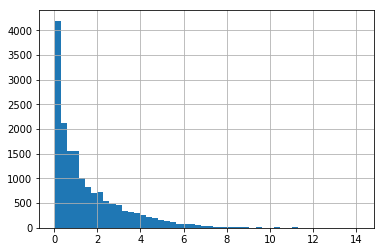

In [355]:
airbnb.reviews_per_month.hist(bins=50)

# Consideration 1: To consider how to deal with all the empty rows.

In [356]:
airbnb.isna().sum()

name                                  5
summary                             529
space                              5702
host_response_time                 6323
host_response_rate                 6323
host_is_superhost                     4
host_identity_verified                4
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            22
bedrooms                              5
beds                                 28
amenities                             0
square_feet                       21225
price                                 0
number_of_reviews                     0
review_scores_rating               5119
review_scores_accuracy             5135
review_scores_cleanliness          5127
review_scores_checkin              5149
review_scores_communication        5133
review_scores_location             5151


In [357]:
#As most of the data in square_feet is unavailable, to remove that column
data = airbnb.drop('square_feet', axis=1)

In [358]:
data.shape

(21450, 28)

In [359]:
data.isna().sum()

name                                 5
summary                            529
space                             5702
host_response_time                6323
host_response_rate                6323
host_is_superhost                    4
host_identity_verified               4
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           22
bedrooms                             5
beds                                28
amenities                            0
price                                0
number_of_reviews                    0
review_scores_rating              5119
review_scores_accuracy            5135
review_scores_cleanliness         5127
review_scores_checkin             5149
review_scores_communication       5133
review_scores_location            5151
review_scores_value               5153
cancellation_policy      

In [360]:
data['host_is_superhost'].fillna('f', inplace=True)
data['host_is_superhost'].isna().sum()

0

In [361]:
data['host_identity_verified'].fillna('f', inplace=True)
data['host_identity_verified'].isna().sum()

0

In [362]:
data.host_response_time.value_counts()

within an hour        11168
within a few hours     2152
within a day           1428
a few days or more      379
Name: host_response_time, dtype: int64

In [363]:
11168+2152+1428+379+6323 

21450

In [364]:
data['host_response_time'].fillna('never', inplace=True)
data['host_response_time'].isna().sum()

0

In [365]:
#Since host_response_rate is a function of host_response_time, to drop host_response_rate and depend on host_response_time instead.
data.drop('host_response_rate', axis=1, inplace=True)

In [366]:
data.shape

(21450, 27)

In [367]:
#Since review scores are based on ratings from people, we can assume that those that are blanks did not receive any ratings and fill them with 0.
data.fillna({'review_scores_rating':0, 'review_scores_accuracy':0, 'review_scores_cleanliness':0, 'review_scores_checkin':0, 'review_scores_communication':0, 'review_scores_location':0, 'review_scores_value':0}, inplace=True)

In [368]:
data.reviews_per_month.describe()

count    16745.000000
mean         1.547330
std          1.681611
min          0.020000
25%          0.300000
50%          0.980000
75%          2.210000
max         14.140000
Name: reviews_per_month, dtype: float64

In [369]:
#Since all other listings with a value for reviews_per_month has a minimum of 0.02, we can assume that all those with NA represent no reviews.
data['reviews_per_month'].fillna(0, inplace=True)
data['reviews_per_month'].isna().sum()

0

In [370]:
data.isna().sum()

name                                 5
summary                            529
space                             5702
host_response_time                   0
host_is_superhost                    0
host_identity_verified               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                           22
bedrooms                             5
beds                                28
amenities                            0
price                                0
number_of_reviews                    0
review_scores_rating                 0
review_scores_accuracy               0
review_scores_cleanliness            0
review_scores_checkin                0
review_scores_communication          0
review_scores_location               0
review_scores_value                  0
cancellation_policy                  0
calculated_host_listings_

### The rest of the columns will be handled at a later date.

# Consideration 2: To consider how many bins to use in classifying the target column.

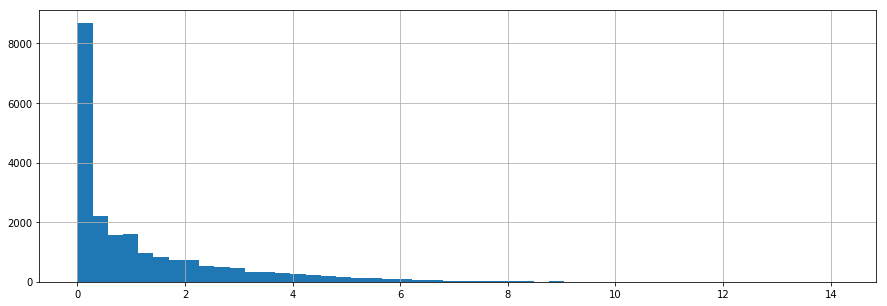

In [371]:
data.reviews_per_month.hist(bins=50, figsize=(15,5))

In [372]:
def f(row):
    if row['reviews_per_month'] <= 2:
        val = 0   
    else:
        val = 1
    return val

data['popular'] = data.apply(f, axis=1)

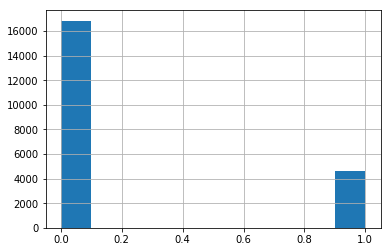

In [373]:
data.popular.hist()

In [374]:
count0 = 0
count1 = 0

for i in data['popular']:
    if i == 0:
        count0 += 1
    else:
        count1 += 1

total = count0 + count1
print('Total listings is ' +  str(total))
print('Less popular listings: Number of listings booked no more than once in 2 weeks is ' + str(count0) + " - " + str(round(count0/total,2)*100) +"%")
print('Popular listings: Number of listings booked more than once in 2 weeks is ' + str(count1) + " - " + str(round(count1/total,2)*100) +"%")

Total listings is 21450
Less popular listings: Number of listings booked no more than once in 2 weeks is 16834 - 78.0%
Popular listings: Number of listings booked more than once in 2 weeks is 4616 - 22.0%


### There is an imbalance problem for the more popular classes of property listings. Will need to see how to best balance the dataset.

# Consideration 3: To confirm which columns to drop depending on the correlation matrix and whether I think the columns play a significant part in the attractiveness of the property.

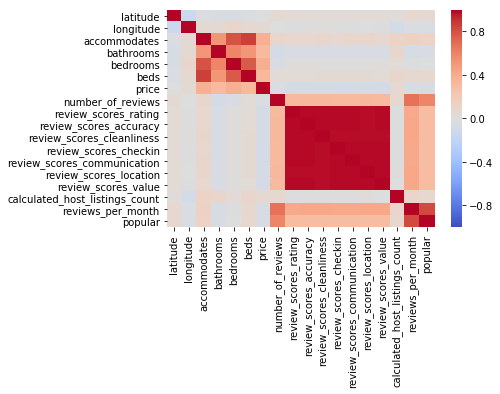

In [375]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

In [376]:
data.corr()

latitude  longitude  accommodates  bathrooms  \
latitude                        1.000000  -0.126179     -0.018084  -0.043329   
longitude                      -0.126179   1.000000      0.054433   0.061808   
accommodates                   -0.018084   0.054433      1.000000   0.522629   
bathrooms                      -0.043329   0.061808      0.522629   1.000000   
bedrooms                       -0.043175   0.095466      0.803798   0.599461   
beds                           -0.026574   0.065523      0.861536   0.517916   
price                          -0.005755   0.054351      0.381421   0.314450   
number_of_reviews               0.062461  -0.002219      0.086230  -0.057391   
review_scores_rating            0.039615   0.006842      0.084522  -0.032632   
review_scores_accuracy          0.041817   0.004631      0.084248  -0.035354   
review_scores_cleanliness       0.039283   0.009791      0.087729  -0.035374   
review_scores_checkin           0.037768   0.006166      0.084783  -0.032868   
review_scores_communication     0.039406   0.003938      0.086562  -0.033819   
review_scores_location          0.041172  -0.000095      0.092775  -0.033202   
review_scores_value             0.039803   0.002824      0.080002  -0.036268   
calculated_host_listings_count  0.029805  -0.073214      0.132690   0.091331   
reviews_per_month               0.081319  -0.025085      0.143707  -0.049151   
popular                         0.069718  -0.023438      0.130427  -0.031866   

                                bedrooms      beds     price  \
latitude                       -0.043175 -0.026574 -0.005755   
longitude                       0.095466  0.065523  0.054351   
accommodates                    0.803798  0.861536  0.381421   
bathrooms                       0.599461  0.517916  0.314450   
bedrooms                        1.000000  0.767720  0.389789   
beds                            0.767720  1.000000  0.335570   
price                           0.389789  0.335570  1.000000   
number_of_reviews              -0.032642  0.038877 -0.028100   
review_scores_rating            0.014476  0.046210 -0.058452   
review_scores_accuracy          0.012028  0.045979 -0.060481   
review_scores_cleanliness       0.014957  0.047691 -0.056284   
review_scores_checkin           0.013448  0.047932 -0.063080   
review_scores_communication     0.013932  0.049263 -0.062580   
review_scores_location          0.015047  0.052367 -0.056566   
review_scores_value             0.009285  0.042804 -0.066535   
calculated_host_listings_count  0.037635  0.091546  0.068309   
reviews_per_month              -0.010248  0.075189 -0.044584   
popular                        -0.002402  0.071160 -0.032559   

                                number_of_reviews  review_scores_rating  \
latitude                                 0.062461              0.039615   
longitude                               -0.002219              0.006842   
accommodates                             0.086230              0.084522   
bathrooms                               -0.057391             -0.032632   
bedrooms                                -0.032642              0.014476   
beds                                     0.038877              0.046210   
price                                   -0.028100             -0.058452   
number_of_reviews                        1.000000              0.313920   
review_scores_rating                     0.313920              1.000000   
review_scores_accuracy                   0.321774              0.990495   
review_scores_cleanliness                0.320475              0.988181   
review_scores_checkin                    0.318608              0.985885   
review_scores_communication              0.319825              0.989368   
review_scores_location                   0.321536              0.983024   
review_scores_value                      0.317581              0.988006   
calculated_host_listings_count           0.073553              0.002919   
reviews_per_month  

From the heatmap above, we can see 2 main areas of possible multicollinearity between features.

Group 1:
- accommodates
- bedrooms
- beds
Which makes sense because all these deal with the number of people that the property can host. As such, it might be better to focus only on one of the features (e.g. accommodates only).

Group 2:
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_location
- review_scores_value
Which makes sense because all these have to do with a guest's impression of the property. As a guest's rating of a property can be assumed to be based on a holistic impression, I will be proposing to the take the sum of all the ratings which is the review_scores_rating.


### As such, I will be proposing to drop these other columns:
- bedrooms
- beds
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_location
- review_scores_value

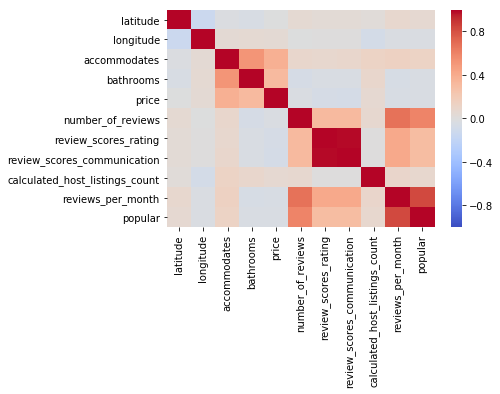

In [377]:
data.drop(columns=['bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_location', 'review_scores_value'], axis=1, inplace=True)
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

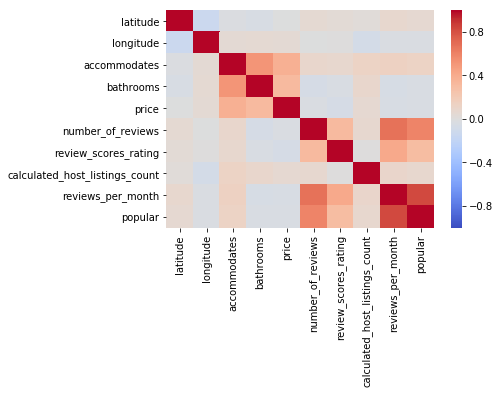

In [378]:
data.drop('review_scores_communication', axis=1, inplace=True)
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

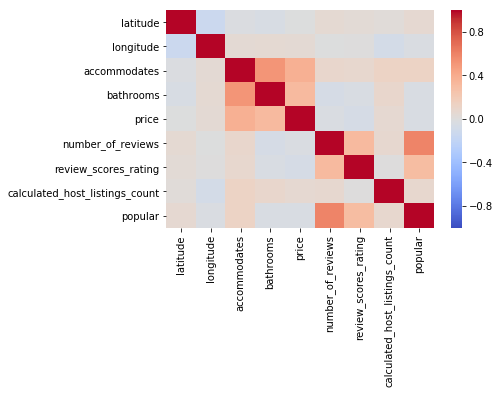

In [379]:
#Since I will be trying to solve a multi-class classification problem, I do not need the reviews_per_month column anymore.
data.drop('reviews_per_month', axis=1, inplace=True)
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

# Consideration 4: To consider how to best use the features with object datatypes (e.g. name, summary, space, amenities)

In [380]:
data.dtypes

name                               object
summary                            object
space                              object
host_response_time                 object
host_is_superhost                  object
host_identity_verified             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
amenities                          object
price                               int64
number_of_reviews                   int64
review_scores_rating              float64
cancellation_policy                object
calculated_host_listings_count      int64
popular                             int64
dtype: object

In [381]:
data.shape

(21450, 19)

In [382]:
data.nunique()

name                              21042
summary                           19570
space                             14651
host_response_time                    5
host_is_superhost                     2
host_identity_verified                2
latitude                          21450
longitude                         21450
property_type                        37
room_type                             3
accommodates                         16
bathrooms                            19
amenities                         20437
price                               492
number_of_reviews                   281
review_scores_rating                 49
cancellation_policy                   5
calculated_host_listings_count       53
popular                               2
dtype: int64

Out of the current dataframe of 19 columns,
18 - Feature Columns
1 - Modified Target Column (i.e. popular based on binned reviews_per_month)

Out of the 18 feature columns, these are identified as object columns:
- name                   - free text
- summary                - free text
- space                  - free text
- host_response_time     - categorical (5)
- host_is_superhost      - boolean (2)
- host_identity_verified - boolean (2)
- property_type          - categorical (37)
- room_type              - categorical (3)
- amenities              - free text
- cancellation_policy    - categorical (5)

As such, one hot encoding / get dummies will probably be used for the categorical features, but will need to see how to best use the features that are based on free text.

In [383]:
#Convert boolean columns to numerical data.
from sklearn import preprocessing

boo_labels = ['t', 'f']

encoder = preprocessing.LabelEncoder()
encoder.fit(boo_labels)

for i, item in enumerate(encoder.classes_):
    print(item, i)

f 0
t 1


In [384]:
data['host_is_superhost'] = encoder.transform(data['host_is_superhost'])
data['host_identity_verified'] = encoder.transform(data['host_identity_verified'])

In [385]:
data['host_response_time'].value_counts()

within an hour        11168
never                  6323
within a few hours     2152
within a day           1428
a few days or more      379
Name: host_response_time, dtype: int64

In [386]:
hostresponse_labels = ['never', 'within an hour', 'within a few hours', 'within a day', 'a few days or more']

encoder = preprocessing.LabelEncoder()
encoder.fit(hostresponse_labels)

for i, item in enumerate(encoder.classes_):
    print(item, i)

a few days or more 0
never 1
within a day 2
within a few hours 3
within an hour 4


In [387]:
def f(row):
    if row['host_response_time'] == 'never':
        val = 0
    elif row['host_response_time'] == 'within an hour':
        val = 1
    elif row['host_response_time'] == 'within a few hours':
        val = 2
    elif row['host_response_time'] == 'within a day':
        val = 3
    else:
        val = 4
    return val

data['host_response_time'] = data.apply(f, axis=1)

In [388]:
data['host_response_time'].value_counts()

1    11168
0     6323
2     2152
3     1428
4      379
Name: host_response_time, dtype: int64

In [389]:
data['cancellation_policy'].value_counts()

strict_14_with_grace_period    8576
flexible                       7221
moderate                       5600
super_strict_30                  40
super_strict_60                  13
Name: cancellation_policy, dtype: int64

In [390]:
def f(row):
    if row['cancellation_policy'] == 'flexible':
        val = 0
    elif row['cancellation_policy'] == 'moderate':
        val = 1
    elif row['cancellation_policy'] == 'strict_14_with_grace_period':
        val = 2
    elif row['cancellation_policy'] == 'super_strict_30':
        val = 3
    else:
        val = 4
    return val

data['cancellation_policy'] = data.apply(f, axis=1)

In [391]:
data.dtypes

name                               object
summary                            object
space                              object
host_response_time                  int64
host_is_superhost                   int64
host_identity_verified              int64
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
amenities                          object
price                               int64
number_of_reviews                   int64
review_scores_rating              float64
cancellation_policy                 int64
calculated_host_listings_count      int64
popular                             int64
dtype: object

In [392]:
data['room_type'].value_counts()

Entire home/apt    13326
Private room        7727
Shared room          397
Name: room_type, dtype: int64

In [393]:
data['property_type'].value_counts()

Apartment                 11761
House                      5726
Townhouse                  1311
Serviced apartment          427
Condominium                 398
Villa                       294
Bed and breakfast           251
Guesthouse                  238
Guest suite                 223
Loft                        175
Bungalow                    165
Cottage                     116
Other                        64
Cabin                        48
Hostel                       39
Farm stay                    37
Boutique hotel               35
Tiny house                   16
Camper/RV                    16
Nature lodge                 16
Hotel                        16
Boat                         15
Earth house                  11
Aparthotel                   10
Chalet                        8
Resort                        7
Tent                          6
Castle                        5
Hut                           3
Treehouse                     3
Barn                          3
Campsite

### To consider how to best handle the remaining 5 columns as a later date.

- name - free text
- summary - free text
- space - free text
- property_type - categorical (might cut down to the top 5/10 property_type and list the rest as others)
- amenities - free text (but might be able to have some overall grouping)

### To also apply get_dummies to categorical columns such as:

- host_response_time (arguable whether this is ordinal or purely categorical)
- cancellation_policy (arguable whether this is ordinal or purely categorical)
- room_type

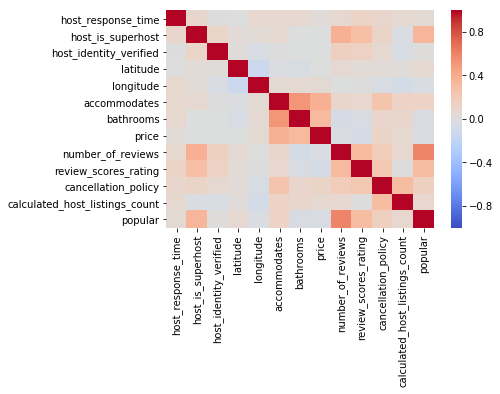

In [394]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

In [395]:
test = data.drop(['name','summary','space','amenities','property_type'], axis=1)

In [396]:
rooms = pd.get_dummies(data.room_type)
rooms.drop(['Shared room'], axis=1, inplace=True)
rooms

Entire home/apt  Private room
0                    0             1
1                    0             1
2                    1             0
3                    0             1
4                    0             1
5                    1             0
6                    0             1
7                    1             0
8                    0             1
9                    0             1
10                   0             1
11                   1             0
12                   1             0
13                   1             0
14                   0             1
15                   0             1
16                   0             1
17                   1             0
18                   0             1
19                   1             0
20                   1             0
21                   1             0
22                   1             0
23                   0             1
24                   0             1
25                   1             0
26                   0             1
27                   1             0
28                   0             1
29                   0             1
...                ...           ...
21420                1             0
21421                0             1
21422                0             1
21423                1             0
21424                1             0
21425                1             0
21426                0             1
21427                0             1
21428                1             0
21429                1             0
21430                1             0
21431                0             1
21432                0             1
21433                1             0
21434                1             0
21435                0             1
21436                1             0
21437                1             0
21438                0             1
21439                0             1
21440                0             1
21441                1             0
21442                1             0
21443                0             1
21444                1             0
21445                1             0
21446                1             0
21447                1             0
21448                1             0
21449                0             1

[21450 rows x 2 columns]

In [397]:
final = pd.concat([test,rooms], axis=1)
final

host_response_time  host_is_superhost  host_identity_verified  \
0                       0                  0                       0   
1                       1                  0                       1   
2                       1                  1                       1   
3                       0                  0                       1   
4                       0                  0                       1   
5                       1                  1                       1   
6                       1                  0                       1   
7                       1                  1                       0   
8                       1                  1                       1   
9                       2                  0                       0   
10                      0                  0                       0   
11                      1                  1                       1   
12                      1                  1                       1   
13                      1                  1                       1   
14                      2                  0                       0   
15                      2                  0                       0   
16                      2                  0                       0   
17                      1                  1                       1   
18                      2                  0                       1   
19                      0                  0                       1   
20                      0                  0                       1   
21                      0                  0                       1   
22                      1                  0                       1   
23                      1                  1                       1   
24                      2                  0                       1   
25                      0                  0                       0   
26                      1                  1                       1   
27                      1                  1                       1   
28                      2                  1                       1   
29                      2                  0                       1   
...                   ...                ...                     ...   
21420                   0                  0                       0   
21421                   0                  0                       0   
21422                   2                  0                       0   
21423                   0                  0                       0   
21424                   1                  0                       0   
21425                   2                  0                       0   
21426                   2                  0                       0   
21427                   0                  0                       0   
21428                   1                  0                       0   
21429                   1                  0                       0   
21430                   1                  0                       0   
21431                   0                  0                       0   
21432                   0                  0                       0   
21433                   0                  0                       0   
21434                   0                  0                       0   
21435                   0                  0                       0   
21436                   0                  0                       0   
21437                   1                  1                       0   
21438                   0                  0                       0   
21439                   0                  0                       0   
21440                   0                  0                       0   
21441                   1                  0                       0   
21442                   1                  0                       0   
21443                   0                  0   

In [398]:
final.drop(['room_type'], axis=1, inplace=True)

In [399]:
def f(row):
    val = row['latitude'] - final.latitude.mean()
    return val

final['lat'] = data.apply(f, axis=1)
final

host_response_time  host_is_superhost  host_identity_verified  \
0                       0                  0                       0   
1                       1                  0                       1   
2                       1                  1                       1   
3                       0                  0                       1   
4                       0                  0                       1   
5                       1                  1                       1   
6                       1                  0                       1   
7                       1                  1                       0   
8                       1                  1                       1   
9                       2                  0                       0   
10                      0                  0                       0   
11                      1                  1                       1   
12                      1                  1                       1   
13                      1                  1                       1   
14                      2                  0                       0   
15                      2                  0                       0   
16                      2                  0                       0   
17                      1                  1                       1   
18                      2                  0                       1   
19                      0                  0                       1   
20                      0                  0                       1   
21                      0                  0                       1   
22                      1                  0                       1   
23                      1                  1                       1   
24                      2                  0                       1   
25                      0                  0                       0   
26                      1                  1                       1   
27                      1                  1                       1   
28                      2                  1                       1   
29                      2                  0                       1   
...                   ...                ...                     ...   
21420                   0                  0                       0   
21421                   0                  0                       0   
21422                   2                  0                       0   
21423                   0                  0                       0   
21424                   1                  0                       0   
21425                   2                  0                       0   
21426                   2                  0                       0   
21427                   0                  0                       0   
21428                   1                  0                       0   
21429                   1                  0                       0   
21430                   1                  0                       0   
21431                   0                  0                       0   
21432                   0                  0                       0   
21433                   0                  0                       0   
21434                   0                  0                       0   
21435                   0                  0                       0   
21436                   0                  0                       0   
21437                   1                  1                       0   
21438                   0                  0                       0   
21439                   0                  0                       0   
21440                   0                  0                       0   
21441                   1                  0                       0   
21442                   1                  0                       0   
21443                   0                  0   

In [400]:
def f(row):
    val = row['longitude'] - final.longitude.mean()
    return val

final['lon'] = data.apply(f, axis=1)
final

host_response_time  host_is_superhost  host_identity_verified  \
0                       0                  0                       0   
1                       1                  0                       1   
2                       1                  1                       1   
3                       0                  0                       1   
4                       0                  0                       1   
5                       1                  1                       1   
6                       1                  0                       1   
7                       1                  1                       0   
8                       1                  1                       1   
9                       2                  0                       0   
10                      0                  0                       0   
11                      1                  1                       1   
12                      1                  1                       1   
13                      1                  1                       1   
14                      2                  0                       0   
15                      2                  0                       0   
16                      2                  0                       0   
17                      1                  1                       1   
18                      2                  0                       1   
19                      0                  0                       1   
20                      0                  0                       1   
21                      0                  0                       1   
22                      1                  0                       1   
23                      1                  1                       1   
24                      2                  0                       1   
25                      0                  0                       0   
26                      1                  1                       1   
27                      1                  1                       1   
28                      2                  1                       1   
29                      2                  0                       1   
...                   ...                ...                     ...   
21420                   0                  0                       0   
21421                   0                  0                       0   
21422                   2                  0                       0   
21423                   0                  0                       0   
21424                   1                  0                       0   
21425                   2                  0                       0   
21426                   2                  0                       0   
21427                   0                  0                       0   
21428                   1                  0                       0   
21429                   1                  0                       0   
21430                   1                  0                       0   
21431                   0                  0                       0   
21432                   0                  0                       0   
21433                   0                  0                       0   
21434                   0                  0                       0   
21435                   0                  0                       0   
21436                   0                  0                       0   
21437                   1                  1                       0   
21438                   0                  0                       0   
21439                   0                  0                       0   
21440                   0                  0                       0   
21441                   1                  0                       0   
21442                   1                  0                       0   
21443                   0                  0   

In [401]:
final.drop(['latitude', 'longitude'], axis=1, inplace=True)

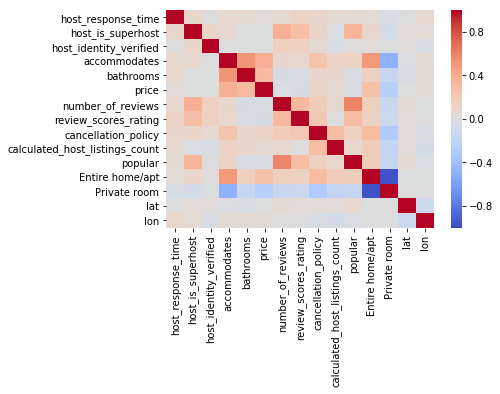

In [402]:
sns.heatmap(final.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

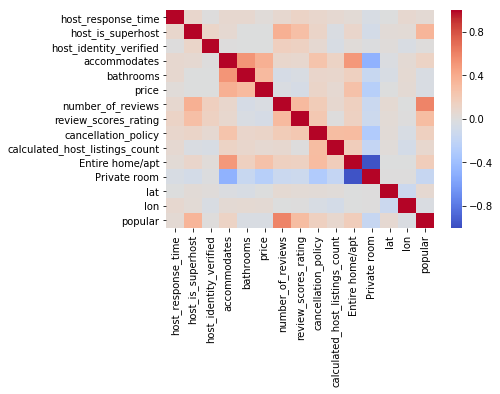

In [403]:
y = final.popular
final.drop(['popular'], axis=1, inplace=True)
final = pd.concat([final,y], axis=1)
sns.heatmap(final.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0)

In [404]:
final.loc[final['bathrooms'] == 0].count()

host_response_time                39
host_is_superhost                 39
host_identity_verified            39
accommodates                      39
bathrooms                         39
price                             39
number_of_reviews                 39
review_scores_rating              39
cancellation_policy               39
calculated_host_listings_count    39
Entire home/apt                   39
Private room                      39
lat                               39
lon                               39
popular                           39
dtype: int64

In [405]:
final.bathrooms.fillna(0, inplace=True)

In [406]:
final.isna().sum()

host_response_time                0
host_is_superhost                 0
host_identity_verified            0
accommodates                      0
bathrooms                         0
price                             0
number_of_reviews                 0
review_scores_rating              0
cancellation_policy               0
calculated_host_listings_count    0
Entire home/apt                   0
Private room                      0
lat                               0
lon                               0
popular                           0
dtype: int64

In [409]:
X = final.drop(['popular'], axis=1)
y = final.popular

In [411]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

In [413]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print('Testing score: ' + str(LR.score(X_test, y_test)))
print('Training score: ' + str(LR.score(X_train, y_train)))

Testing score: 0.872459444340854
Training score: 0.8717598060545783


In [414]:
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

Entire home/apt  Private room  accommodates  bathrooms  \
0           0.0503     -0.596981      0.185437   -0.13628   

   calculated_host_listings_count  cancellation_policy  \
0                        0.005976            -0.108979   

   host_identity_verified  host_is_superhost  host_response_time       lat  \
0               -0.970695           0.594064           -0.068597  1.301431   

        lon  number_of_reviews     price  review_scores_rating  
0 -0.834085            0.05266 -0.004383              0.032826